In [1]:
pip install fastai --upgrade

     |████████████████████████████████| 189 kB 5.5 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
import fastai
from fastai.vision.all import *
import numpy as np

In [3]:
path = untar_data(URLs.MNIST_SAMPLE)

In [4]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/labels.csv')]

In [5]:
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/7'),Path('/root/.fastai/data/mnist_sample/train/3')]

In [6]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

threes

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

In [7]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [8]:
im7_path = sevens[2]
im7 = Image.open(im7_path)
im7

In [9]:
array(im3)[4:10, 4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [10]:
tensor(im3)[4:10, 4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [11]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15, 4:22])
df.style.set_properties(**{'font-size' : '6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [12]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]

len(seven_tensors), len(three_tensors)

(6265, 6131)

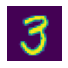

In [13]:
show_image(three_tensors[2])

In [14]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

stacked_threes.shape

torch.Size([6131, 28, 28])

In [15]:
len(stacked_threes.shape)

3

In [16]:
stacked_threes.ndim

3

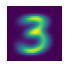

In [17]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

In [18]:
mean3.shape

torch.Size([28, 28])

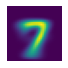

In [19]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

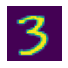

In [20]:
a_3 = stacked_threes[1]
show_image(a_3);

In [21]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()

dist_3_abs, dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [22]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()

dist_7_abs, dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [23]:
F.l1_loss(a_3.float(), mean7), F.mse_loss(a_3, mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

In [24]:
stacked_sevens.mean(1).shape

torch.Size([6265, 28])

In [25]:
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])

In [26]:
valid_3_tens = valid_3_tens.float() / 255
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])

valid_7_tens = valid_7_tens.float()/ 255

In [27]:
len(valid_3_tens), len(valid_7_tens)

(1010, 1028)

In [28]:
def mnist_distance(a, b):
  return (a-b).abs().mean((-1, -2))

In [29]:
mnist_distance(a_3, mean3)

tensor(0.1114)

In [30]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1092, 0.1082, 0.1120,  ..., 0.1228, 0.1377, 0.1258]),
 torch.Size([1010]))

In [31]:
def is_3(x):
  return mnist_distance(x, mean3) < mnist_distance(x, mean7)

In [32]:
is_3(a_3)

tensor(True)

In [33]:
is_3(a_3).float()

tensor(1.)

In [34]:
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [35]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1 - is_3(valid_7_tens).float().mean())

In [36]:
accuracy_3s, accuracy_7s, (accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [37]:
def f(x):
  return x**2

In [38]:
! pip install utils
from utils import *

In [39]:
def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6,4)):
    x = torch.linspace(min,max)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x,f(x))
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    if title is not None: ax.set_title(title)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /pytorch/aten/src/ATen/native/RangeFactories.cpp:25.)
  


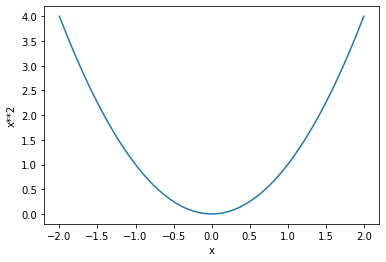

In [40]:
plot_function(f, 'x', 'x**2')

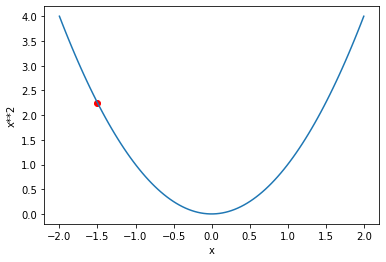

In [41]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(1.5), color = 'red')

In [42]:
xt = tensor(3.).requires_grad_()

In [43]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [44]:
yt.backward()

In [45]:
xt.grad

tensor(6.)

In [46]:
xt = tensor([3., 4., 10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [47]:
def f(x):
  return (x**2).sum()

In [48]:
yt = f(xt)

In [49]:
yt

tensor(125., grad_fn=<SumBackward0>)

In [50]:
yt.backward()

In [51]:
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [52]:
xt.grad

tensor([ 6.,  8., 20.])

In [53]:
time = torch.arange(0,20).float();
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

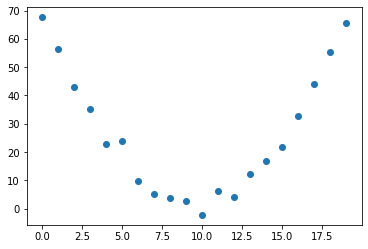

In [54]:
speed = torch.randn(20)*3 + 0.75*(time - 9.5)**2 + 1
plt.scatter(time,speed)

In [55]:
def f(t, params):
  a,b,c = params
  return a*(t**2) + (b*t) + c

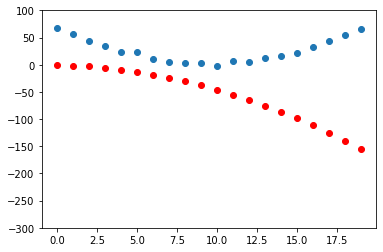

In [56]:
def mse(preds, targets):
  return ((preds - targets)**2).mean()

# step 1 - initialize the parameters 

params = torch.randn(3).requires_grad_()

# step 2 - calculate the predictions

preds = f(time, params)

def show_preds(preds, ax = None):
  if ax is None : ax = plt.subplots()[1]
  ax.scatter(time, speed)
  ax.scatter(time, to_np(preds), color = 'red')
  ax.set_ylim(-300, 100)

show_preds(preds)

In [57]:
# step 3 - calculate the loss

loss = mse(preds, speed)

print (loss)

tensor(9907.3984, grad_fn=<MeanBackward0>)


In [58]:
# step 4 - calculate the gradients

loss.backward()
params.grad


tensor([-32250.1094,  -2080.8684,   -162.7787])

In [59]:
params.grad*1e-5

tensor([-0.3225, -0.0208, -0.0016])

In [60]:
# step 5 - step the weights
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [61]:
preds = f(time, params)
mse(preds, speed)

tensor(2413.6067, grad_fn=<MeanBackward0>)

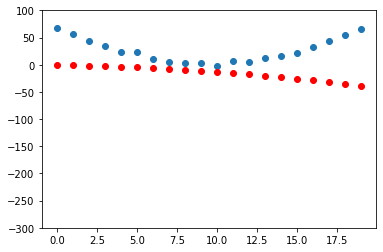

In [62]:
show_preds(preds)

In [63]:
def apply_step(params, prn = True):
  preds = f(time, params)
  loss = mse(preds, speed)
  loss.backward()
  params.data -= lr * params.grad.data
  params.grad = None
  if prn :
    print (loss.item())
  return preds

In [64]:
for i in range(10):
  apply_step(params)

2413.606689453125
995.5474853515625
727.2027587890625
676.4190673828125
666.8046875
664.9805908203125
664.6309814453125
664.5601806640625
664.5421752929688
664.5340576171875


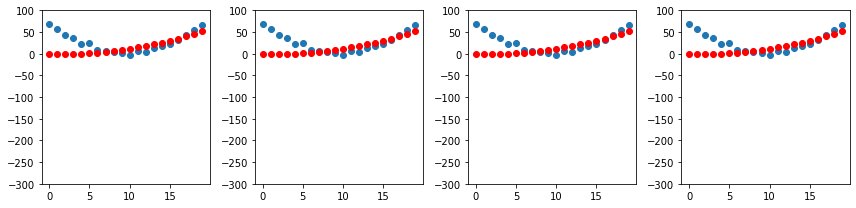

In [65]:
_, axs = plt.subplots(1, 4, figsize = (12,3))

for ax in axs :
  show_preds(apply_step(params, False), ax)
  plt.tight_layout()

In [66]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

train_y =  tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
print (train_x.shape, train_y.shape)

dset = list(zip(train_x, train_y))
x,y = dset[0]

print (x.shape, y)

torch.Size([12396, 784]) torch.Size([12396, 1])
torch.Size([784]) tensor([1])


In [67]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)

valid_dset = list(zip(valid_x, valid_y))

In [68]:
def init_params(size, std = 1.0):
  return (torch.randn(size)*std).requires_grad_()

weights = init_params((28*28*1))

In [69]:
bias = init_params(1)

In [70]:
(train_x[0]*weights.T).sum() + bias

tensor([23.6760], grad_fn=<AddBackward0>)

In [71]:
def linear1(xb):
  return xb@weights + bias

In [72]:
preds = linear1(train_x)

In [73]:
preds

tensor([23.6760, 20.0635, 15.9953,  ..., -9.2009,  0.4934, -2.1273],
       grad_fn=<AddBackward0>)

In [74]:
corrects = (preds > 0.0).float() == train_y

In [75]:
corrects

tensor([[ True,  True,  True,  ..., False,  True, False],
        [ True,  True,  True,  ..., False,  True, False],
        [ True,  True,  True,  ..., False,  True, False],
        ...,
        [False, False, False,  ...,  True, False,  True],
        [False, False, False,  ...,  True, False,  True],
        [False, False, False,  ...,  True, False,  True]])

In [76]:
corrects.float().mean().item()

0.49659639596939087

In [77]:
def mnist_loss(predictions, targets):
  return torch.where(targets==1, 1-predictions, predictions).mean()

In [78]:
help(torch.where)

Help on built-in function where:

where(...)
    where(condition, x, y) -> Tensor
    
    Return a tensor of elements selected from either :attr:`x` or :attr:`y`, depending on :attr:`condition`.
    
    The operation is defined as:
    
    .. math::
        \text{out}_i = \begin{cases}
            \text{x}_i & \text{if } \text{condition}_i \\
            \text{y}_i & \text{otherwise} \\
        \end{cases}
    
    .. note::
        The tensors :attr:`condition`, :attr:`x`, :attr:`y` must be :ref:`broadcastable <broadcasting-semantics>`.
    
    .. note::
        Currently valid scalar and tensor combination are
        1. Scalar of floating dtype and torch.double
        2. Scalar of integral dtype and torch.long
        3. Scalar of complex dtype and torch.complex128
    
    Arguments:
        condition (BoolTensor): When True (nonzero), yield x, otherwise yield y
        x (Tensor or Scalar): value (if :attr:x is a scalar) or values selected at indices
                         

In [79]:
x = torch.randn(3,2)

x

tensor([[-0.0296, -1.5420],
        [ 1.9675,  0.2772],
        [-2.1623,  0.5488]])

In [80]:
y = torch.ones(3, 2)

y

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [81]:
torch.where(x > 0, x, y)

tensor([[1.0000, 1.0000],
        [1.9675, 0.2772],
        [1.0000, 0.5488]])

In [82]:
trgts = tensor([1, 0, 1])
prds = tensor([0.9, 0.4, 0.2])

In [83]:
mnist_loss(prds, trgts)

tensor(0.4333)

In [84]:
def sigmoid(x) :
  return 1/(1+torch.exp(-x))

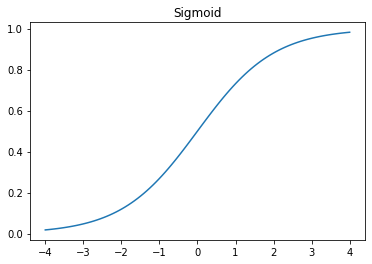

In [85]:
plot_function(torch.sigmoid, title = "Sigmoid", min = -4, max = 4)

In [86]:
def mnist_loss(predictions, targets):
  predictions = predictions.sigmoid()
  return torch.where(targets==1, 1-predictions, predictions).mean()

In [87]:
coll = range(15)

dl = DataLoader(coll, batch_size = 5, shuffle = True)

list(dl)

[tensor([8, 0, 5, 2, 1]),
 tensor([13, 12, 10,  7,  4]),
 tensor([ 9, 11,  3, 14,  6])]

In [88]:
ds = L(enumerate(string.ascii_lowercase))

ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [89]:
dl = DataLoader(ds, batch_size = 6, shuffle = True)

list(dl)

[(tensor([13, 23,  9,  3, 12, 14]), ('n', 'x', 'j', 'd', 'm', 'o')),
 (tensor([ 6, 24, 11, 22, 25,  1]), ('g', 'y', 'l', 'w', 'z', 'b')),
 (tensor([15, 20, 18,  0, 17, 19]), ('p', 'u', 's', 'a', 'r', 't')),
 (tensor([16,  5, 10,  2, 21,  4]), ('q', 'f', 'k', 'c', 'v', 'e')),
 (tensor([7, 8]), ('h', 'i'))]

In [90]:
weights = init_params((28*28, 1))
bias = init_params(1)

dl = DataLoader(dset, batch_size = 256)
xb, yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [91]:
valid_dl = DataLoader(valid_dset, batch_size = 256)
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [92]:
preds = linear1(batch)
preds

tensor([[ -7.1667],
        [-19.3690],
        [ -9.6083],
        [-10.0048]], grad_fn=<AddBackward0>)

In [93]:
loss = mnist_loss(preds, train_y[:4])

In [94]:
loss

tensor(0.9998, grad_fn=<MeanBackward0>)

In [95]:
loss.backward()
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784, 1]), tensor(-3.1907e-05), tensor([-0.0002]))

In [96]:
def calc_grad(xb, yb, model):
  preds = model(xb)
  loss = mnist_loss(preds, yb)
  loss.backward()

In [97]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-6.3814e-05), tensor([-0.0004]))

In [98]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-9.5721e-05), tensor([-0.0007]))

In [99]:
weights.grad.zero_()
bias.grad.zero_();

In [100]:
def train_epoch(model, lr, params):
  for xb, yb in dl :
    calc_grad(xb, yb, model)
    for p in params :
      p.data -= p.grad*lr
      p.grad.zero_()

In [101]:
def batch_accuracy(xb, yb):
  preds = xb.sigmoid()
  correct = (preds>0.5) == yb 
  return correct.float().mean()

In [102]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.)

In [103]:
def validate_epoch(model) :
  accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
  return round(torch.stack(accs).mean().item(), 4)

validate_epoch(linear1)

0.4959

In [104]:
lr = 1
params = weights, bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.684

In [105]:
for i in range(20):
  train_epoch(linear1, lr, params)
  print (validate_epoch(linear1), end = ' ')

0.8467 0.9028 0.9267 0.9408 0.9481 0.9525 0.9564 0.9603 0.9618 0.9642 0.9662 0.9676 0.9676 0.9686 0.9696 0.9706 0.9706 0.9716 0.9721 0.9726 

In [106]:
linear_model = nn.Linear(28*28, 1)

In [107]:
w,b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [108]:
class BasicOptim :
  def __init__(self, params, lr): self.params, self.lr = list(params), lr

  def step(self, *args, **kwargs):
    for p in self.params : p.data -= p.grad.data * self.lr 

  def zero_grad(self, *args, **kwargs) :
    for p in self.params: p.grad = None 

In [109]:
opt = BasicOptim(linear_model.parameters(), lr)

In [110]:
def train_epoch(model) :
  for xb, yb in dl :
    calc_grad(xb, yb, model)
    opt.step()
    opt.zero_grad()

In [111]:
validate_epoch(linear_model)

0.4941

In [112]:
def train_model(model, epochs) :
  for i in range(epochs):
    train_epoch(model)
    print (validate_epoch(model), end = " ")

In [113]:
train_model(linear_model, 20)

0.4932 0.7095 0.8589 0.9175 0.9351 0.9492 0.9575 0.9629 0.9658 0.9678 0.9707 0.9722 0.9741 0.9751 0.9761 0.9771 0.9775 0.978 0.978 0.978 

In [114]:
linear_model = nn.Linear(28*28, 1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.8779 0.8223 0.9102 0.9316 0.9473 0.9551 0.9614 0.9658 0.9678 0.9697 0.9717 0.9731 0.9746 0.9756 0.9771 0.9775 0.978 0.9785 0.979 

In [115]:
dls = DataLoaders(dl, valid_dl)

In [117]:
learn = Learner(dls, nn.Linear(28*28, 1), opt_func = SGD, loss_func= mnist_loss,metrics = batch_accuracy)

In [118]:
learn.fit(10, lr = lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636919,0.502910,0.495584,00:00
1,0.391882,0.265270,0.753189,00:00
2,0.149036,0.151210,0.864082,00:00
3,0.068275,0.096777,0.919038,00:00
4,0.038351,0.072764,0.936212,00:00
5,0.026519,0.059148,0.950932,00:00
6,0.021552,0.050521,0.956820,00:00
7,0.019264,0.044720,0.963199,00:00
8,0.018047,0.040604,0.965653,00:00
9,0.017280,0.037547,0.968597,00:00


In [119]:
def simple_net(xb):
  res = xb@w1 + b1
  res = res.max(tensor(0.0))
  res = res@w2 +b2
  return res

In [120]:
w1 = init_params((28*28, 30))
b1 = init_params(30)
w2 = init_params((30, 1))
b2 = init_params(1)

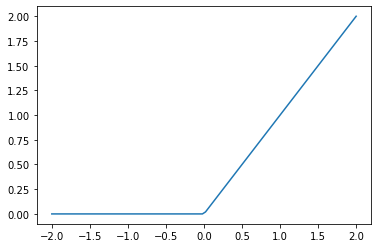

In [121]:
plot_function(F.relu)

In [122]:
simple_net = nn.Sequential(nn.Linear(28*28, 30),
                           nn.ReLU(),
                           nn.Linear(30, 1))

In [123]:
learn = Learner(dls, simple_net, opt_func = SGD, loss_func = mnist_loss, metrics = batch_accuracy)

learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.334688,0.402039,0.505888,00:00
1,0.154082,0.232115,0.803729,00:00
2,0.084006,0.114977,0.914132,00:00
3,0.054308,0.077202,0.942100,00:00
4,0.040655,0.060230,0.957802,00:00
5,0.033771,0.050779,0.963690,00:00
6,0.029879,0.044831,0.966634,00:00
7,0.027391,0.040759,0.967615,00:00
8,0.025623,0.037796,0.969087,00:00
9,0.024266,0.035539,0.972031,00:00


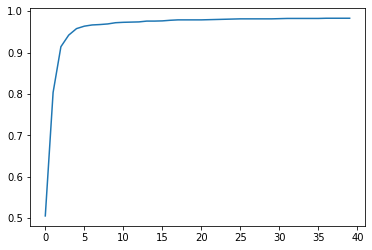

In [124]:
plt.plot(L(learn.recorder.values).itemgot(2));

In [127]:
learn.recorder.values[-1][2]

0.982826292514801